# Text Emotion Classification With Python and Keras

* https://realpython.com/python-keras-text-classification/  
* https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras

**Groupe BLUE ['Myriam',  'Ludo',  'Jean-Pierre',  'Olivier']**

# Neural Network, Perceptron, Keras and more  

## Etude du perceptron  

* https://lucidar.me/fr/neural-networks/simplest-perceptron/  
Etudier et reproduire les 2 tutos, de regréssion linéaire et non-linéaire de Lulu.  

* https://lucidar.me/fr/neural-networks/curve-fitting-nonlinear-regression/  

- Modifier le nombre de layers cachés et le nombre de **UNITS** sur les layers  
Qu'observez vous au niveaux des performances (utiliser la MSE)  

- Trouver un moyen d'afficher la convergence du modéle aux cours des itérations (dans un graphique).  
Modifier le modéle pour pouvoir apprendre le modéle sur des données en deux dimensions (un plan)  

## Veilles

### Activation function  

* https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/  
* https://deeplylearning.fr/cours-theoriques-deep-learning/fonction-dactivation/  

### Hidden layers/design  

* https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/  
* https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e  

### Dropout/Regularisation

* https://stackoverflow.com/questions/53893206/how-to-create-a-sparse-layer-in-keras-i-e-not-all-neurons-are-connected-to-eac  
* https://keras.io/api/layers/regularization_layers/dropout/  

### Solver/optimizer  

* https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3  
* https://mlfromscratch.com/optimizers-explained/  
* https://datascience.stackexchange.com/questions/10523/guidelines-for-selecting-an-optimizer-for-training-neural-networks  

### Dependencies  

* install keras and tensorflow  
Note : If you encounter some issues installing tensorflow with python3.9 & pip :  
https://stackoverflow.com/questions/62830862/how-to-install-python3-8-on-debian-10  


## Data set LOAD & ANALYSIS

In [1]:
import pandas as pd

df = pd.read_csv('../../data/text_emotion.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [2]:
sentences = df.content
sentences.describe()

count                                                 40000
unique                                                39827
top       I just received a mothers day card from my lov...
freq                                                     14
Name: content, dtype: object

In [3]:
import numpy as np

print(len(max(sentences)), sentences[np.argmax(sentences)])

103 ï¿½ï¿½h. iï¿½m gonna go in the &quot;big&quot; house now, borrow my sis guitar and play and maybe write


In [4]:
labels = df.sentiment
labels.describe()

count       40000
unique         13
top       neutral
freq         8638
Name: sentiment, dtype: object

In [5]:
classes = labels.value_counts()
print(classes)

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


## Data set PRE-PROCESSING

In [6]:
import nltk
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'tiffanylue': 42821,
 'know': 23951,
 'listenin': 25397,
 'bad': 4904,
 'habit': 18389,
 'earlier': 13695,
 'started': 40172,
 'freakin': 16392,
 'part': 32130,
 'layin': 24699,
 'bed': 5480,
 'headache': 18885,
 'ughhhh': 44369,
 'waitin': 45578,
 'call': 7763,
 'funeral': 16693,
 'ceremony': 8438,
 'gloomy': 17538,
 'friday': 16509,
 'wants': 45674,
 'hang': 18598,
 'friends': 16527,
 'soon': 39476,
 'dannycastillo': 11371,
 'want': 45669,
 'trade': 43469,
 'someone': 39412,
 'houston': 19817,
 'tickets': 42781,
 'one': 31344,
 'pinging': 32955,
 'ghostridah14': 17306,
 'go': 17593,
 'prom': 33999,
 'bc': 5314,
 'bf': 5794,
 'like': 25174,
 'sleep': 38909,
 'im': 20429,
 'thinking': 42582,
 'old': 31246,
 'friend': 16516,
 'married': 26954,
 'damn': 11231,
 'amp': 3281,
 'scandalous': 37156,
 'hmmm': 19445,
 'http': 19878,
 'www': 46926,
 'djhero': 12780,
 'com': 9817,
 'charviray': 8675,
 'charlene': 8629,
 'love': 25908,
 'miss': 28253,
 'kelcouch': 23406,
 'sorry': 39552,
 'least

In [8]:
from sklearn.model_selection import train_test_split

y = labels

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y,
                                                                    test_size=0.1,
                                                                    random_state=42)

print('sentences_train', sentences_train.shape)
print('sentences_test', sentences_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

sentences_train (36000,)
sentences_test (4000,)
y_train (36000,)
y_test (4000,)


In [9]:
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Logistic Regression Accuracy = {:.2%}".format(score))

Logistic Regression Accuracy = 33.70%


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

print('y_train', y_train.shape)
print('y_test', y_test.shape)


y_train (36000,)
y_test (4000,)


## SEQUENTIAL Keras model

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Number of features
input_dim = X_train.shape[1]

model = keras.Sequential()
model.add(layers.Dense(units=128, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(units=64, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=13, activation='softmax'))


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5720960   
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1677      
Total params: 5,722,637
Trainable params: 5,722,637
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=4, verbose=2, validation_data=(X_test, y_test), batch_size=1024)

Epoch 1/4
36/36 - 2s - loss: 2.3961 - accuracy: 0.2700 - val_loss: 2.2007 - val_accuracy: 0.3018
Epoch 2/4
36/36 - 1s - loss: 2.0195 - accuracy: 0.4179 - val_loss: 2.0366 - val_accuracy: 0.3428
Epoch 3/4
36/36 - 1s - loss: 1.7372 - accuracy: 0.5018 - val_loss: 1.9594 - val_accuracy: 0.3505
Epoch 4/4
36/36 - 1s - loss: 1.4597 - accuracy: 0.5802 - val_loss: 1.9395 - val_accuracy: 0.3557


In [15]:
print('MIN loss =', min(history.history['loss']))
print('MAX accuracy =', max(history.history['accuracy']))

MIN loss = 1.4597362279891968
MAX accuracy = 0.5801944732666016


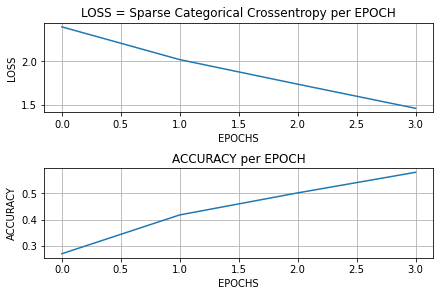

In [16]:
import matplotlib.pyplot as plt

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

# Add a title to the axes
ax1.set_title('LOSS = Sparse Categorical Crossentropy per EPOCH')
ax2.set_title('ACCURACY per EPOCH')

# Add an x-label to the axes
ax1.set_xlabel('EPOCHS')
ax2.set_xlabel('EPOCHS')

# Add a y-label to the axes
ax1.set_ylabel('LOSS')
ax2.set_ylabel('ACCURACY')

# Plot results
ax1.plot(history.history['loss'])
ax2.plot(history.history['accuracy'])

# Add a grid
ax1.grid(True)
ax2.grid(True)

plt.show()


In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("TRAIN Accuracy\t{:.2%}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("TEST Accuracy\t{:.2%}".format(accuracy))

TRAIN Accuracy	65.58%
TEST Accuracy	35.57%


In [18]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='TRAIN')
    plt.plot(x, val_acc, 'r', label='TEST')
    plt.title('ACCURACY')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='TRAIN')
    plt.plot(x, val_loss, 'r', label='TEST')
    plt.title('LOSS')
    plt.legend()


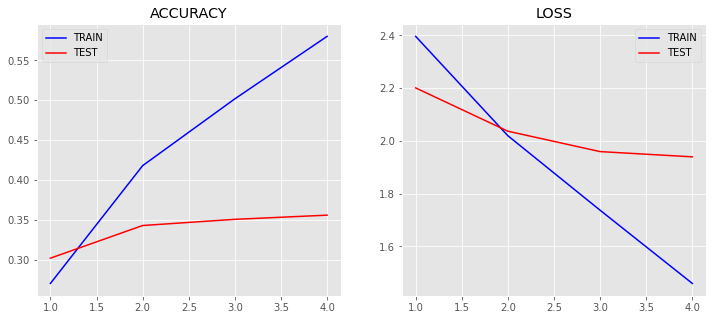

In [19]:
plot_history(history)

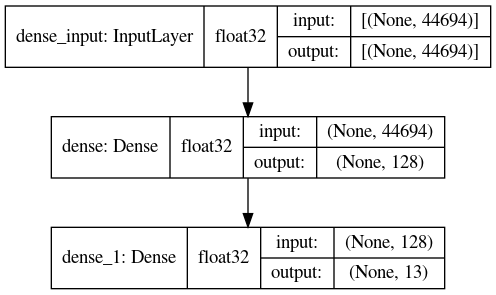

In [20]:
from datetime import datetime

now = datetime.now()
keras.utils.plot_model(
    model,
    to_file="text-emotion-classification-model-{}.png".format(now),
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

## One-Hot Encoding

## Word-embedding avec Keras  

### Decouverte du word-embedding  

la couche Embeding de Keras (Word embedding) sur votre jeu de classification de texte (émotions)  
Quel est l'impact de cette couche sur vos résultats d'entrainement ?  

### Advice  

Faites une fonction type "classification report" prenant en entrée un modéle/expérience donnée et qui vous retourne les résultats de classification, dont notamment :

* Accuracy  
* F1 score pour chaque classe  
* Temps d'apprentissage  
* Nombre de neurone/poids de votre modèle

### Questions  

* Quel doit être le format de donnée en entrée de la couche "Embedding" ?  
* Expliquer ce que fait et le rôle de la fonction pad_sequence ?  
* Quels sont les paramètres important de cette fonction ?  
* Expliquer ce que fait et le rôle de la couche GlobalMaxPool1d ?  
* Quels sont les paramètres importants ?  
* Quelles alternatives ?  

### Manipulation

* Extraire la matrice d'embedding et le dictionnaire de mappig des mots  
* Comment calculer la similarité entre deux mots ?  
* Pre-trained model => utiliser un modéle d'embedding pré-entrainé pour initialiser vos poids (https://nlp.stanford.edu/projects/glove/)  
* Expliquer le role du paramètre trainable ?  
* Quel est l'impact sur les performances ?  

Bonus : explorer différent modéle (ie paramètrisation) pour trouver le plus performant.  
Tips : You can use the Grid-Search function of scikit-learn with Keras model ;-)

### Ressources

* https://learn-neural-networks.com/world-embedding-by-keras/  
* https://medium.com/@kadircanercetin/intuitive-understanding-of-word-embeddings-with-keras-6435fe92a57b
* https://nlp.stanford.edu/projects/glove/  
* https://github.com/keras-team/keras/issues/3110  


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1


In [22]:
print("vocab_size (words) =", vocab_size)


vocab_size (words) = 45594


In [24]:
print("len(sentences_train[2]) =", len(sentences_train[2]))
print(sentences_train[2])
print(list(sentences_train[2]))
print("len(X_train[2]) =", len(X_train[2]))
print(X_train[2])

len(sentences_train[2]) = 35
Funeral ceremony...gloomy friday...
['F', 'u', 'n', 'e', 'r', 'a', 'l', ' ', 'c', 'e', 'r', 'e', 'm', 'o', 'n', 'y', '.', '.', '.', 'g', 'l', 'o', 'o', 'm', 'y', ' ', 'f', 'r', 'i', 'd', 'a', 'y', '.', '.', '.']
len(X_train[2]) = 9
[29, 2423, 6, 234, 11, 9110, 72, 210, 191]


## Words INDEX

In [25]:
for word in ['the', 'all', 'happy', 'sad']:
    print('{} : {}'.format(word, tokenizer.word_index[word]))

the : 3
all : 29
happy : 49
sad : 112


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = len(max(sentences))
if maxlen < 150:
    maxlen = 150
print("maxlen =", maxlen)

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)

print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

print("X_train :\n", X_train[0, :])

maxlen = 150
X_train : (36000, 150)
y_train : (36000,)
X_test : (4000, 150)
y_test : (4000,)
X_train :
 [   1   19   83   28 2549    2   23  141  113    4  137    6    4  493
  104   40  664   52    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


## Keras Embedding + Flatten Layers

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

embedding_dim = 50

model = keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           2279700   
_________________________________________________________________
flatten (Flatten)            (None, 7500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                375050    
_________________________________________________________________
dense_3 (Dense)              (None, 13)                663       
Total params: 2,655,413
Trainable params: 2,655,413
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=1024)
print("----------------------------------------------------------------------------------------")

Epoch 1/5
36/36 - 4s - loss: 2.2150 - accuracy: 0.2238 - val_loss: 2.1455 - val_accuracy: 0.2567
Epoch 2/5
36/36 - 3s - loss: 2.1225 - accuracy: 0.2652 - val_loss: 2.1056 - val_accuracy: 0.2657
Epoch 3/5
36/36 - 3s - loss: 2.0496 - accuracy: 0.2974 - val_loss: 2.0508 - val_accuracy: 0.3035
Epoch 4/5
36/36 - 3s - loss: 1.9303 - accuracy: 0.3586 - val_loss: 1.9962 - val_accuracy: 0.3187
Epoch 5/5
36/36 - 3s - loss: 1.7786 - accuracy: 0.4206 - val_loss: 1.9689 - val_accuracy: 0.3243
----------------------------------------------------------------------------------------


1125/1125 - 7s - loss: 1.6632 - accuracy: 0.4724
Training Accuracy = 47.24%
125/125 - 1s - loss: 1.9689 - accuracy: 0.3243
Testing Accuracy = 32.43%


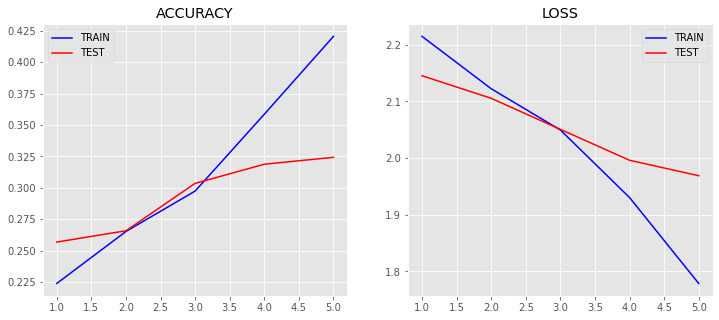

In [29]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy = {:.2%}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy = {:.2%}".format(accuracy))

plot_history(history)

## Keras Embedding + Max/Average Pooling Layers

In [30]:
model = keras.Sequential()
emb = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)
model.add(emb)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 50)           2279700   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 13)                663       
Total params: 2,282,913
Trainable params: 2,282,913
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=1024)
print("----------------------------------------------------------------------------------------")

Epoch 1/10
36/36 - 4s - loss: 2.4622 - accuracy: 0.1941 - val_loss: 2.3185 - val_accuracy: 0.2118
Epoch 2/10
36/36 - 3s - loss: 2.2058 - accuracy: 0.2294 - val_loss: 2.1522 - val_accuracy: 0.2295
Epoch 3/10
36/36 - 3s - loss: 2.1267 - accuracy: 0.2769 - val_loss: 2.1191 - val_accuracy: 0.2775
Epoch 4/10
36/36 - 3s - loss: 2.0812 - accuracy: 0.3047 - val_loss: 2.0717 - val_accuracy: 0.2968
Epoch 5/10
36/36 - 3s - loss: 2.0055 - accuracy: 0.3439 - val_loss: 2.0064 - val_accuracy: 0.3228
Epoch 6/10
36/36 - 3s - loss: 1.9083 - accuracy: 0.3820 - val_loss: 1.9555 - val_accuracy: 0.3368
Epoch 7/10
36/36 - 3s - loss: 1.8093 - accuracy: 0.4098 - val_loss: 1.9288 - val_accuracy: 0.3428
Epoch 8/10
36/36 - 3s - loss: 1.7056 - accuracy: 0.4501 - val_loss: 1.9199 - val_accuracy: 0.3515
Epoch 9/10
36/36 - 3s - loss: 1.5934 - accuracy: 0.4955 - val_loss: 1.9283 - val_accuracy: 0.3512
Epoch 10/10
36/36 - 3s - loss: 1.4722 - accuracy: 0.5393 - val_loss: 1.9520 - val_accuracy: 0.3455
-------------------

1125/1125 - 5s - loss: 1.3779 - accuracy: 0.5769
Training Accuracy = 57.69%
125/125 - 1s - loss: 1.9520 - accuracy: 0.3455
Testing Accuracy = 34.55%


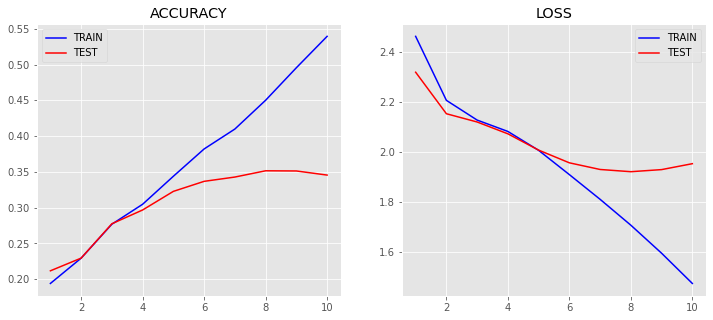

In [32]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy = {:.2%}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy = {:.2%}".format(accuracy))

plot_history(history)

In [33]:
my_embeddings = emb.get_weights()[0]
print(my_embeddings.shape)
my_embeddings

(45594, 50)


array([[-4.6556678e-02, -6.1995458e-02, -6.7439899e-02, ...,
        -6.5041706e-02, -2.7884236e-02, -6.5786935e-02],
       [-5.2527871e-02, -6.0331579e-02, -3.5477061e-02, ...,
        -6.6408426e-02, -2.0662783e-02, -1.5051704e-02],
       [-4.8390888e-02, -6.3759662e-02, -3.6971129e-02, ...,
        -5.4918215e-02, -2.2752022e-02, -2.5860889e-02],
       ...,
       [-2.2719875e-03,  2.3620237e-02,  8.4854476e-03, ...,
        -1.0910653e-02, -6.6896789e-03,  4.7953773e-02],
       [ 1.3608526e-02, -4.6692789e-05, -4.5940090e-02, ...,
         1.3234103e-01, -1.7147254e-02, -3.8996648e-02],
       [ 4.5709498e-03,  4.6223883e-02, -2.2060622e-02, ...,
        -2.6634598e-02, -4.1307099e-03, -2.2891188e-02]], dtype=float32)

## Glove Twitter 6B PRETRAINED Word EMBEDDINGS  

* https://nlp.stanford.edu/projects/glove/  
* http://nlp.stanford.edu/data/glove.6B.zip  


In [34]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    # Adding again 1 because of reserved 0 index
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [35]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'data/glove.6B/glove.6B.50d.txt',
    tokenizer.word_index,
    embedding_dim)


In [36]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print("Embeddings Matrix Density = {:.2%}".format(nonzero_elements / vocab_size))

Embeddings Matrix Density = 46.91%


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 50)           2279700   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 13)                663       
Total params: 2,282,913
Trainable params: 2,282,913
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.backend import clear_session

clear_session()

In [40]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=1024)
print("----------------------------------------------------------------------------------------")

Epoch 1/20
36/36 - 4s - loss: 2.3071 - accuracy: 0.1825 - val_loss: 2.1674 - val_accuracy: 0.2243
Epoch 2/20
36/36 - 3s - loss: 2.1530 - accuracy: 0.2283 - val_loss: 2.1349 - val_accuracy: 0.2407
Epoch 3/20
36/36 - 3s - loss: 2.1209 - accuracy: 0.2528 - val_loss: 2.1111 - val_accuracy: 0.2560
Epoch 4/20
36/36 - 3s - loss: 2.0903 - accuracy: 0.2756 - val_loss: 2.0859 - val_accuracy: 0.2788
Epoch 5/20
36/36 - 3s - loss: 2.0586 - accuracy: 0.2931 - val_loss: 2.0630 - val_accuracy: 0.2860
Epoch 6/20
36/36 - 3s - loss: 2.0277 - accuracy: 0.3088 - val_loss: 2.0410 - val_accuracy: 0.3018
Epoch 7/20
36/36 - 3s - loss: 1.9970 - accuracy: 0.3219 - val_loss: 2.0215 - val_accuracy: 0.3085
Epoch 8/20
36/36 - 3s - loss: 1.9653 - accuracy: 0.3343 - val_loss: 2.0085 - val_accuracy: 0.3117
Epoch 9/20
36/36 - 3s - loss: 1.9361 - accuracy: 0.3472 - val_loss: 1.9941 - val_accuracy: 0.3180
Epoch 10/20
36/36 - 3s - loss: 1.9083 - accuracy: 0.3577 - val_loss: 1.9871 - val_accuracy: 0.3240
Epoch 11/20
36/36 -

1125/1125 - 5s - loss: 1.6398 - accuracy: 0.4588
Training Accuracy = 45.88%
125/125 - 1s - loss: 1.9920 - accuracy: 0.3340
Testing Accuracy = 33.40%


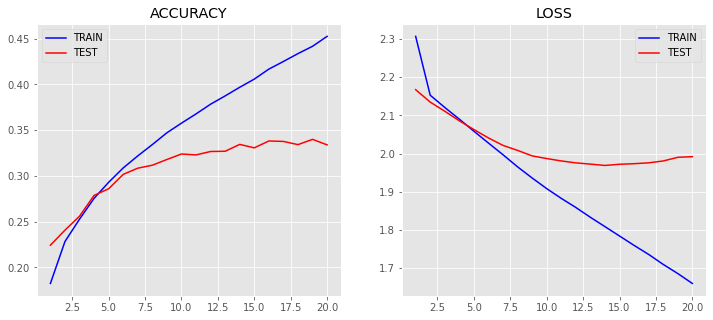

In [41]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy = {:.2%}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy = {:.2%}".format(accuracy))

plot_history(history)

## Model explanation  

* Rétrospective sur le modèle de Deep learning, alignement, et brainstorm des améliorations possibles en terme de preprocesing et paramétrage.  
* Ecriture d'une fonction permettant de prédire la classe d'un document avec le modèle.  
Rediscussion de l'interpétation de la fonction de sortie : signmoid, softmax, linear, ...

In [42]:
y_pred = model.predict(X_test)

# show the inputs and predicted outputs
for i in range(len(X_test)):
    #pred = np.argmax(list(encoder.inverse_transform(y_pred[i])))
    pred = encoder.inverse_transform([np.argmax(y_pred[i])])
    print("X=%s, Predicted = %s" % (X_test[i], pred[0]))

X=[27 98  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0], Predicted = happiness
X=[    1    19   354     5   501    32    14 10535   152    71     3   249
  1121  3324     6  6439    11   141   232   458     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
    

    0    0    0    0    0    0    0    0    0    0], Predicted = love
X=[ 6717   295     4   430  1536    10    30  5979  6249   443    81    25
 10902    26 13664   332     6     8    46 14227 12463     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = w

X=[ 955    1   19  947    1  149   15  191  824  803   11    5  323  462
 1563    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = happiness
X=[ 209  174   21   24 8998    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

    0    0    0    0    0    0    0    0    0    0], Predicted = sadness
X=[6384   17   25  193    1   25   34   36  445  131  508    3  843  776
  409    9  407    3 1181 2071    1   65   86   16 2149    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[ 254   34  209 2565  142 1665    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0


    0    0    0    0    0    0    0    0    0    0], Predicted = sadness
X=[ 139  229    2  307   31    2 2168 6422 1461 5917 1027   17  649   36
  221 1153   11   64 1216  224    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[  549     2  2437    31     5   103 23069    18  4774  3125  1952     1
   283     0     0     0     0     0     0     0     0     0     0   

    0    0    0    0    0    0    0    0    0    0], Predicted = sadness
X=[  79   11    3 8069    6 1967   32   14   13   90 3228    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[ 102  244 2841    1   60   23   42  136   55    1   65   48    2  159
   11    0    0    0    0    0    0    0    0    0    0    0    0    0


    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[ 1411 18990   636     1  1925     5  1899  3422    17     1   773   224
  2154    19   211     1   595   187   606   395   452     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = 

     0     0     0     0     0     0], Predicted = worry
X=[   1   54    1  356  157    7  280   14  103   64   85 3403   85    3
 5598   17    1   93    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = happiness
X=[ 1203  1414     1    93     7   560   248 44389    90  2082     1   114
     1  2484    15   258  6723     0     0     0     0     0     0     0
     0  

X=[2266   27   98 2722   40    5  824    6    1  787   14  139   73 2961
   47   44   45  290   66    7   10 1190    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = love
X=[ 4820    20   758   211     1  1454    33   191   685    14     3 10900
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0    

X=[10617  1214     4  4152   124    30    22 41104   117    23    61   127
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = happiness
X=[  1 933 211  59 154   0   0   0   0   0   0   0   0   0   

    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[ 67 552  11 314 770   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0], Predicted = neutral
X=[  116    41     1   189   637    32    53  1004   230     5  1922     9
 13800     2    39    88     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  

X=[405 418 525  11  30  52  11 151 257 145  21 115 104  57   2  11   3 257
 596   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0], Predicted = neutral
X=[ 248  505 1020  669   13   88   25  645   81 1339 1771  213 1303   31
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0

X=[  85   12   44 6027    4    6    1   15  106   48   31   11  280  458
  167  280  458  228    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = happiness
X=[   1  271 4000   31    5 6113   24    5 1689    6  104 1413    8   57
   26   27   26   27  486 2759  775  543  343 1688    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

   0   0   0   0   0   0], Predicted = love
X=[    1    45 10635   826    16    84 36711    22     6     4  1137    12
  9571     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = love
X=[    5   182   101  

X=[13755     6   373    24  2420    18    36   832    11    13    38   220
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = happiness
X=[ 172    7  926  192  156 2403  531 1003 1598   87  193    

X=[ 9063    38   148    58 13650     1   885     7   786     6   256     3
 13910  1030     6     1   261   885     7   213   798  1739  1772  5759
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = neutral
X=[154 122  15   2 271   4 197  31  11   8   0   0   0   0   0 

    0    0    0    0    0    0    0    0    0    0], Predicted = worry
X=[ 268   40   34    4 3999   10  993   12    5  436  124   30    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], Predicted = love
X=[268  17 515 135 815 200   1 235   8 117   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

X=[ 3111 30973   290   182   284    49   144    21     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], Predicted = love
X=[2620  539  108    0    0    0    0    0    0    0    0    0    

In [43]:
def predict_emo():
    my_text = input("Enter text for EMOTION PREDICTION : ")
    X = tokenizer.texts_to_sequences([my_text])
    X = pad_sequences(X, padding='post', maxlen=maxlen)
    y = model.predict(X)
    pred = encoder.inverse_transform([np.argmax(y)])
    return print("Predicted emotion =>", str.upper(pred[0]))


In [44]:
predict_emo()

Enter text for EMOTION PREDICTION : How do you do today ?
Predicted emotion => NEUTRAL


## Convolutional Neural Networks (CNN)

In [48]:
embedding_dim = 100

model = keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(100, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          4559400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 146, 100)          50100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                663       
Total params: 4,615,213
Trainable params: 4,615,213
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=1024)
print("----------------------------------------------------------------------------------------")


Epoch 1/5
36/36 - 29s - loss: 2.3052 - accuracy: 0.2090 - val_loss: 2.1542 - val_accuracy: 0.2573
Epoch 2/5
36/36 - 28s - loss: 2.1099 - accuracy: 0.2749 - val_loss: 2.0756 - val_accuracy: 0.2995
Epoch 3/5
36/36 - 28s - loss: 1.9734 - accuracy: 0.3400 - val_loss: 1.9429 - val_accuracy: 0.3462
Epoch 4/5
36/36 - 29s - loss: 1.7698 - accuracy: 0.4166 - val_loss: 1.9034 - val_accuracy: 0.3548
Epoch 5/5
36/36 - 30s - loss: 1.5321 - accuracy: 0.5164 - val_loss: 1.9470 - val_accuracy: 0.3523
----------------------------------------------------------------------------------------


1125/1125 - 21s - loss: 1.3167 - accuracy: 0.6038
Training Accuracy = 60.38%
125/125 - 2s - loss: 1.9470 - accuracy: 0.3523
Testing Accuracy = 35.23%


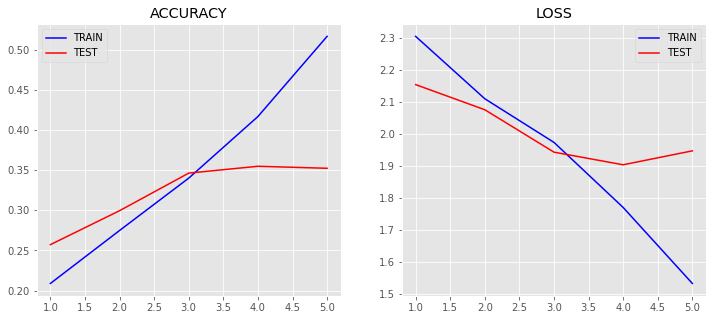

In [50]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy = {:.2%}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy = {:.2%}".format(accuracy))

plot_history(history)

## Lime & Shap  

* Utiliser lime pour prédire la classification d'un document quelconque.  
* Réaliser une enquête pour expliquer les features qui impact le modéle positivement et négativement.  
Extrayez un certaine nombre de document bien classés et mal classés pour chaque classe.  
Proposez des idées d'améliorations.  

* Bonus1 : même exercice avec shape.  
* Bonus2 : implementer vos améliorations.  

### Ressources

* https://github.com/marcotcr/lime  
* https://github.com/slundberg/shap  
